Imports

In [2]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


importing Jupyter notebook from Basic_Operations_Sherbrooke.ipynb
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Qubit 110 has an estimated frequency of 4.834517433356426 GHz.
Default anharmonicity is -0.30953885962680133 GHz.


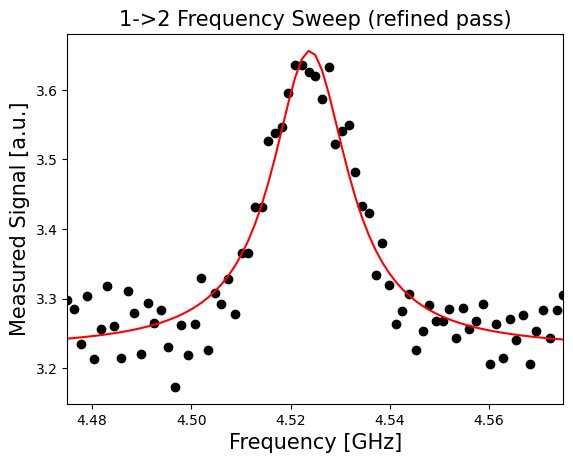

Our updated estimate for the 1->2 transition frequency is 4.5238585 +/- 0.00035512019237283105 GHz.
The transition frequency from |1> to |2> is  4.5239 +/- 3.551e-04
[-0.16966556  3.46115568  0.52927972 -0.21457908]


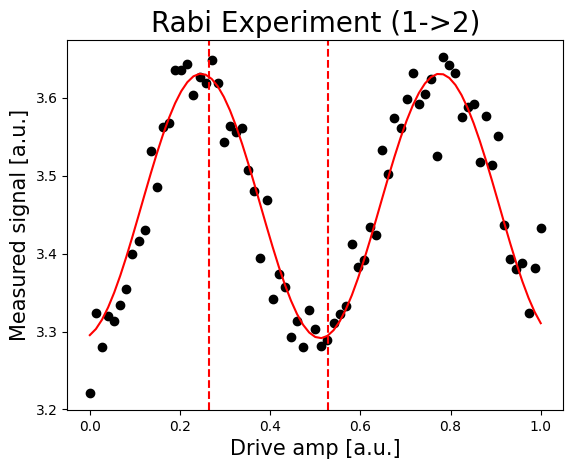

Pi Amplitude (1->2) = 0.2646398579529892 +/- 0.004122943650852532


<string>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


(3072, 2)
0.935546875
0.93359375
Qubit 118 has an estimated frequency of 4.737478828192968 GHz.
Default anharmonicity is -0.31213784976055814 GHz.
Our updated estimate for the 1->2 transition frequency is 4.4246725 +/- 0.0005515251779789336 GHz.


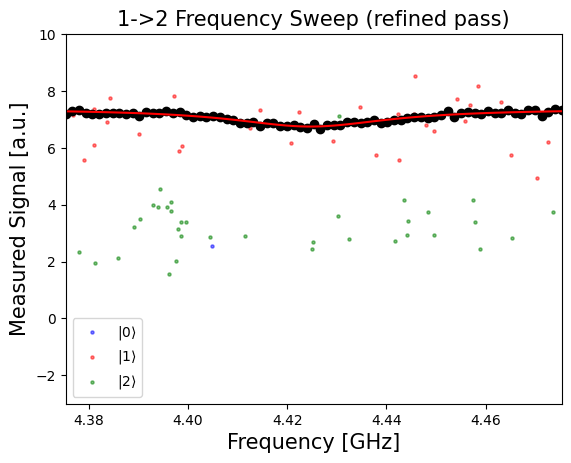

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/opt/homebrew/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


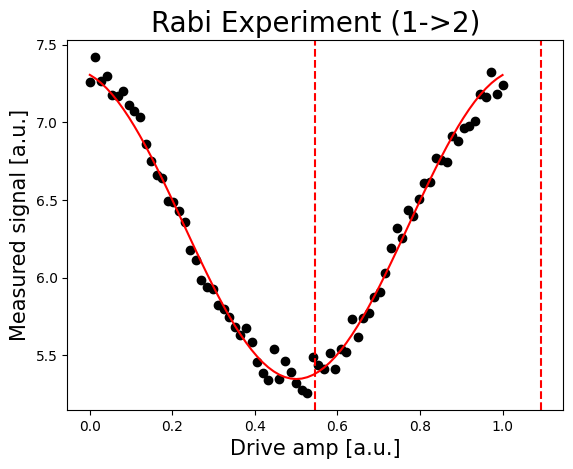

[ 0.99560442  6.34416861  1.09250157 -0.26405645]
Pi Amplitude (1->2) = 0.5462507843026214 +/- 0.01630161980241117
[4523858458.08406, 4424672486.313643]
[0.2646398579529892, 0.5462507843026214]


<string>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<string>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


0.890625
Schedule((0, Play(GaussianSquare(duration=1072, sigma=64, width=816, amp=0.08117606741074938, angle=0.030843394989292446, name='CR90p_d118_u253'), DriveChannel(118), name='CR90p_d118_u253')), (0, Play(GaussianSquare(duration=1072, sigma=64, width=816, amp=0.2299413576798327, angle=2.643083574483243, name='CR90p_u253'), ControlChannel(253), name='CR90p_u253')), (1072, Play(Drag(duration=256, sigma=64, beta=0.10526276411319659, amp=0.177282146834722, angle=0.0, name='Xp_d110'), DriveChannel(110), name='Xp_d110')), (1328, Play(GaussianSquare(duration=1072, sigma=64, width=816, amp=0.08117606741074938, angle=-3.1107492586005008, name='CR90m_d118_u253'), DriveChannel(118), name='CR90m_d118_u253')), (1328, Play(GaussianSquare(duration=1072, sigma=64, width=816, amp=0.22994135767983273, angle=-0.4985090791065503, name='CR90m_u253'), ControlChannel(253), name='CR90m_u253')), name="ecr")


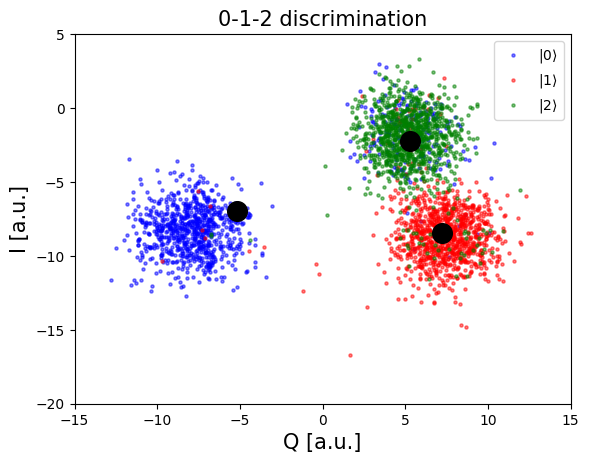

In [3]:
import import_ipynb
from Basic_Operations_Sherbrooke import*

In [4]:
from qiskit import IBMQ

from qiskit import pulse                  # This is where we access all of our Pulse features!
from qiskit.circuit import Parameter      # This is Parameter Class for variable parameters.
from qiskit.circuit import QuantumCircuit, QuantumRegister, Gate, ClassicalRegister
from qiskit import transpile, schedule
from qiskit.pulse import Schedule, Play, ControlChannel, GaussianSquare
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
IBMQ.save_account('d6fe7c51d919ea32a8afaa63b338eba80aa931f71849e7c8bc761bc8d9bfa99c4e5924a5ec2013b8a0bcbb7b54982a6b10c02518d40bb4c4f30af907ccd72e07', overwrite=True)
IBMQ.load_account()

# get backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_sherbrooke')
backend_defaults = backend.defaults()

ibmqfactory.load_account:WARNING:2024-05-06 07:30:10,569: Credentials are already in use. The existing account in the session will be replaced.


Hamiltonian Tomography for the CR Gate

In [6]:
#Basic Params

backend_config = backend.configuration()
ham_params = backend_config.hamiltonian['vars']
dt = backend_config.dt
print(f'Sampling time: {dt*1e9} ns')

Sampling time: 0.2222222222222222 ns


In [7]:
print(backend_config.hamiltonian)

{'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dagger_{i} + b_{i}$.\n\nQubits are coupled through resonator buses. The provided Hamiltonian has been projected into the zero excitation subspace of the resonator buses leading to an effective qubit-qubit flip-flop interaction. The qubit resonance frequencies in the Hamiltonian are the cavity dressed frequencies and not exactly what is returned by the backend defaults, which also includes the dressing due to the qubit-qubit interactions.\n\nQuantities are returned in angular frequencies, with units 2*pi*GHz.\n\nWARNING: Currently not all system Hamiltonian information is available

In [8]:
control_qubit = 110
target_qubit = 118
    
inst_sched_map = backend_defaults.instruction_schedule_map 
cr_duration = 1072
cr_sigma = 64
cr_square_width = 816
cr_risefall = (cr_duration - cr_square_width) / (2*cr_sigma)


In [9]:
print(qubit_frequency_data, qubit_pi_pulse_data)


[4523858458.08406, 4424672486.313643] [0.2646398579529892, 0.5462507843026214]


In [10]:
# qubit_frequency_data = [4524311825.781629, 4424950028.419181]
# qubit_pi_pulse_data = [0.26463989455396814, 0.5462507843026214]
# qubit_classifiers = []

In [11]:
scale_factor = 1e-7
NUM_SHOTS = 1024

In [12]:
def reshape_complex_vec(vec):
    """Take in complex vector vec and return 2d array w/ real, imag entries. This is needed for the learning.
    Args:
        vec (list): complex vector of data
    Returns:
        list: vector w/ entries given by (real(vec], imag(vec))
    """
    length = len(vec)
    vec_reshaped = np.zeros((length, 2))
    for i in range(len(vec)):
        vec_reshaped[i]=[np.real(vec[i]), np.imag(vec[i])]
    return vec_reshaped

In [13]:
def get_job_data(job, average, qubit):
    """Retrieve data from a job that has already run.
    Args:
        job (Job): The job whose data you want.
        average (bool): If True, gets the data assuming data is an average.
                        If False, gets the data assuming it is for single shots.
    Return:
        list: List containing job result data. 
    """
    job_results = job.result(timeout = 120) # timeout parameter set to 120 s
    result_data = []
    for i in range(len(job_results.results)):
        if average: # get avg data
            result_data.append(np.real(job_results.get_memory(i)[qubit] * scale_factor))
        else: # get single data
            result_data.append(job_results.get_memory(i)[:, qubit] * scale_factor)
    return result_data

def get_closest_multiple_of_16(num):
    """Compute the nearest multiple of 16. Needed because pulse enabled devices require 
    durations which are multiples of 16 samples.
    """
    return int(num + 8 ) - (int(num + 8 ) % 16)

In [14]:
# IQ_012_data = get_job_data(backend.retrieve_job('crkkn2m4r70g0088sjrg'), average=False, qubit = control_qubit)
# zero_data = IQ_012_data[0]
# one_data = IQ_012_data[1]
# two_data = IQ_012_data[2]

# zero_data_reshaped = reshape_complex_vec(zero_data)
# one_data_reshaped = reshape_complex_vec(one_data)  
# two_data_reshaped = reshape_complex_vec(two_data)  

# IQ_012_data = np.concatenate((zero_data_reshaped, one_data_reshaped, two_data_reshaped))

# state_012 = np.zeros(NUM_SHOTS) # shots gives number of experiments
# state_012 = np.concatenate((state_012, np.ones(NUM_SHOTS)))
# state_012 = np.concatenate((state_012, 2*np.ones(NUM_SHOTS)))
# # print(len(state_012))

# # Shuffle and split data into training and test sets
# IQ_012_train, IQ_012_test, state_012_train, state_012_test = train_test_split(IQ_012_data, state_012, test_size=0.5)
# classifier = svm.SVC(kernel = 'rbf')
# classifier.fit(IQ_012_train, state_012_train)
# print(classifier.score(IQ_012_train, state_012_train))
# qubit_classifiers.append(classifier)

In [15]:
qubit_classifiers

[SVC(), SVC()]

In [16]:
x12_duration = 320
x12_sigma = 64

Pi Pulses for both Qubits

In [17]:
control_qbit_x12_freq = qubit_frequency_data[0]
control_qbit_pi_amp_12 = qubit_pi_pulse_data[0]

with pulse.build(backend) as cq_x12_gate:
    drive_chan = pulse.drive_channel(control_qubit)
    pulse.set_frequency(control_qbit_x12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=control_qbit_pi_amp_12,
                              sigma=x12_sigma,
                              name='x12'), drive_chan)
    
target_qbit_x12_freq = qubit_frequency_data[1]  
target_qbit_pi_amp_12 = qubit_pi_pulse_data[1]
with pulse.build(backend) as tq_x12_gate:
    drive_chan = pulse.drive_channel(target_qubit)
    pulse.set_frequency(target_qbit_x12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=target_qbit_pi_amp_12,
                              sigma=x12_sigma,
                              name='x12'), drive_chan)

Hadamard gate for both Qubits

In [18]:
with pulse.build(backend) as cq_h_gate:
    drive_chan = pulse.drive_channel(control_qubit)
    pulse.set_frequency(control_qbit_x12_freq, drive_chan)
    pulse.shift_phase(-np.pi/2, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=control_qbit_pi_amp_12/2,
                              sigma=x12_sigma,
                              name='h_12'), drive_chan)
    pulse.shift_phase(-np.pi/2, drive_chan)

with pulse.build(backend) as tq_h_gate:
    drive_chan = pulse.drive_channel(target_qubit)
    pulse.set_frequency(target_qbit_x12_freq, drive_chan)
    pulse.shift_phase(-np.pi/2, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=target_qbit_pi_amp_12/2,
                              sigma=x12_sigma,
                              name='h12'), drive_chan)
    pulse.shift_phase(-np.pi/2, drive_chan)

New Backend

In [19]:
# IBMQ.save_account('52d6100c45751e631f6d9369baf61398416d72da27c3c36b0f02c7879c7814419e4ae3757f6edd7ebd3c640022d4778f87aa0ec67b03852a40d680f4076136c4', overwrite=True)
# IBMQ.load_account()

# # get backend
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = provider.get_backend('ibm_sherbrooke')
# backend_defaults = backend.defaults()

CR Gate Tuning

In [20]:
cr_gate_freq = 4.422833431806622*GHz

In [21]:
def cr_pulse_sequence(control_in_two:bool, basis, cr_amp:float, cr_duration, cr_square_width, cr_phase):
    with pulse.build(backend=backend, name='CR amp sweep') as cr_sched:
        u_chan = pulse.control_channels(control_qubit, target_qubit)[0]
        target_chan = pulse.DriveChannel(target_qubit)
        control_chan = pulse.DriveChannel(control_qubit)
        pulse.set_frequency(control_qbit_x12_freq, control_chan)
        pulse.set_frequency(target_qbit_x12_freq, target_chan)
        pulse.set_frequency(cr_gate_freq, u_chan)
        with pulse.align_sequential():
            if(control_in_two):
                pulse.call(cq_x12_gate)
            with pulse.align_left():
                # pulse.play(pulse.GaussianSquare(duration=cr_duration,
                #                         amp=cr_amp,
                #                         sigma=cr_sigma, width = cr_square_width,
                #                         name='cr_pulse'), target_chan)
                    
                pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                    amp=cr_amp, angle = cr_phase,
                                    sigma=cr_sigma, width = cr_square_width,
                                    name='cr_pulse'), u_chan)                     
            pulse.call(cq_x12_gate)
            with pulse.align_right():
                # pulse.play(pulse.GaussianSquare(duration=cr_duration,
                #                     amp= -cr_amp,
                #                     sigma=cr_sigma, width = cr_square_width,
                #                     name='cr_pulse'), target_chan)

                pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                    amp= -cr_amp, angle = cr_phase,
                                    sigma=cr_sigma, width = cr_square_width,
                                    name='cr_pulse'), u_chan)
            pulse.call(cq_x12_gate)
            if basis == 'X':
                pulse.call(tq_h_gate)
            elif basis == 'Y':
                pulse.shift_phase(3*np.pi/2, target_chan)
                pulse.call(tq_h_gate)
    return cr_sched

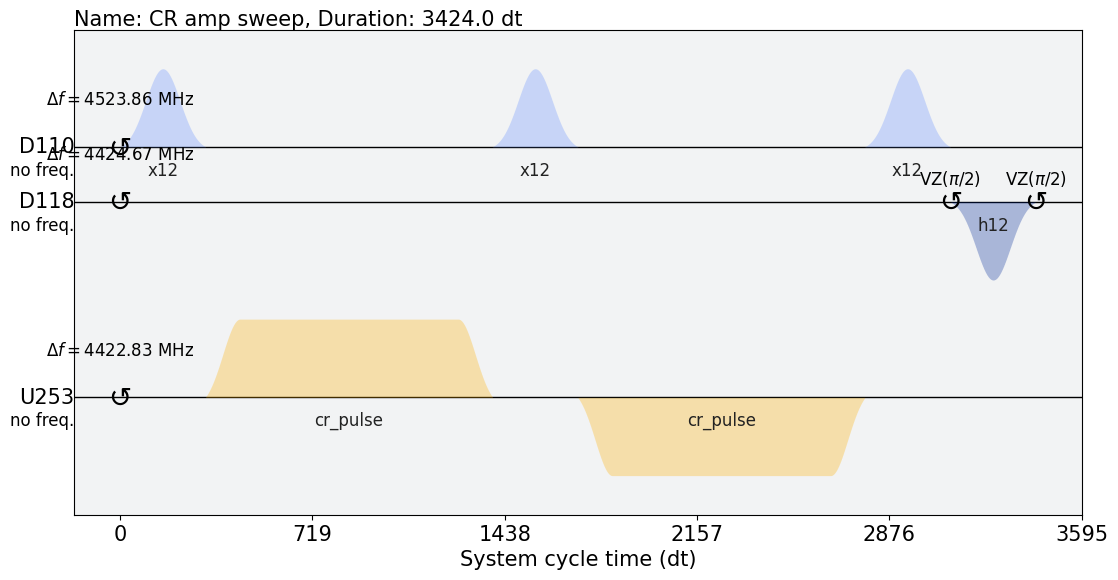

In [22]:
cr_pulse_sequence(True, 'X', 1, 1072, 816, 0.0).draw()

In [23]:
print(cr_duration, cr_square_width)

1072 816


Seeing what happens to the control qubit as we vary the frequency of the target

In [ ]:
sweep_freqs = cr_gate_freq + np.linspace(-15*MHz, 15*MHz, 50)
freq = Parameter('freq')

with pulse.build(backend=backend, name='CR amp sweep') as cr_sched:
    u_chan = pulse.control_channels(control_qubit, target_qubit)[0]
    target_chan = pulse.DriveChannel(target_qubit)
    control_chan = pulse.DriveChannel(control_qubit)
    pulse.set_frequency(control_qbit_x12_freq, control_chan)
    pulse.set_frequency(target_qbit_x12_freq, target_chan)
    pulse.set_frequency(freq, u_chan)
    with pulse.align_sequential():
        with pulse.align_left():
            # pulse.play(pulse.GaussianSquare(duration=cr_duration,
            #                         amp=cr_amp,
            #                         sigma=cr_sigma, width = cr_square_width,
            #                         name='cr_pulse'), target_chan)
                
            pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                amp=cr_amp, angle = 0,
                                sigma=cr_sigma, width = cr_square_width,
                                name='cr_pulse'), u_chan)                     
        pulse.call(cq_x12_gate)
        with pulse.align_right():
            # pulse.play(pulse.GaussianSquare(duration=cr_duration,
            #                     amp= -cr_amp,
            #                     sigma=cr_sigma, width = cr_square_width,
            #                     name='cr_pulse'), target_chan)

            pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                amp= -cr_amp, angle = 0,
                                sigma=cr_sigma, width = cr_square_width,
                                name='cr_pulse'), u_chan)
        pulse.call(cq_x12_gate)
        with pulse.align_left():
            # pulse.play(pulse.GaussianSquare(duration=cr_duration,
            #                         amp=cr_amp,
            #                         sigma=cr_sigma, width = cr_square_width,
            #                         name='cr_pulse'), target_chan)
                
            pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                amp=cr_amp, angle = 0,
                                sigma=cr_sigma, width = cr_square_width,
                                name='cr_pulse'), u_chan)                     
        pulse.call(cq_x12_gate)
        with pulse.align_right():
            # pulse.play(pulse.GaussianSquare(duration=cr_duration,
            #                     amp= -cr_amp,
            #                     sigma=cr_sigma, width = cr_square_width,
            #                     name='cr_pulse'), target_chan)

            pulse.play(pulse.GaussianSquare(duration=cr_duration,
                                amp= -cr_amp, angle = 0,
                                sigma=cr_sigma, width = cr_square_width,
                                name='cr_pulse'), u_chan)
        pulse.call(cq_x12_gate)

In [ ]:
cr_sweep_gate = Gate('cr_test', 2, [freq])
circ = QuantumCircuit(target_qubit+1,target_qubit+1)
circ.x(control_qubit)
circ.x(target_qubit)
circ.append(cr_sweep_gate, [control_qubit,target_qubit])
circ.measure(control_qubit, control_qubit)
circ.measure(target_qubit,target_qubit)
circ.add_calibration(cr_sweep_gate, (control_qubit,target_qubit), cr_sched, [freq])

exp_cr_sweep_circs = [circ.assign_parameters({freq: f}) for f in sweep_freqs]


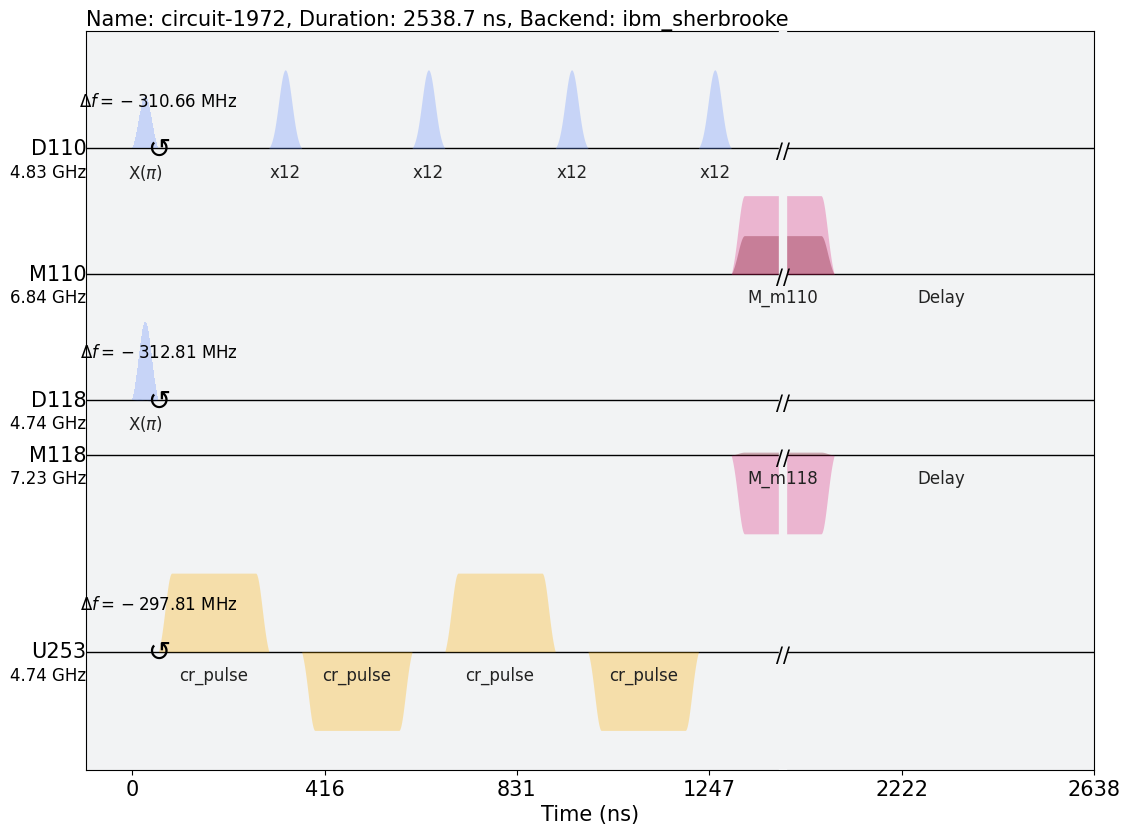

In [ ]:
from qiskit import transpile, schedule
cr_test_scheds = schedule(exp_cr_sweep_circs[-1], backend)
cr_test_scheds.draw(backend = backend)

In [ ]:
# cr_freq_sweep_job = backend.run(exp_cr_sweep_circs, meas_level=1, meas_return = 'single', shots = 512)

In [ ]:
cr_freq_results = backend.retrieve_job('crtrzfny7jt000804y20').result()

4.409670166500501
[138, 327, 47] 0.81640625
[12, 481, 19] 0.92578125

4.41028241139846
[58, 401, 53] 0.79296875
[13, 484, 15] 0.94140625

4.410894656296419
[114, 330, 68] 0.734375
[13, 472, 27] 0.89453125

4.411506901194378
[52, 373, 87] 0.66015625
[19, 427, 66] 0.7421875

4.412119146092338
[34, 178, 300] -0.171875
[11, 395, 106] 0.5859375

4.412731390990296
[169, 115, 228] 0.109375
[12, 426, 74] 0.7109375

4.413343635888256
[42, 411, 59] 0.76953125
[14, 441, 57] 0.77734375

4.413955880786215
[60, 136, 316] -0.234375
[13, 430, 69] 0.73046875

4.414568125684174
[102, 222, 188] 0.265625
[10, 372, 130] 0.4921875

4.415180370582133
[54, 98, 360] -0.40625
[14, 352, 146] 0.4296875

4.415792615480092
[52, 129, 331] -0.29296875
[16, 413, 83] 0.67578125

4.4164048603780515
[42, 327, 143] 0.44140625
[17, 414, 81] 0.68359375

4.4170171052760105
[33, 121, 358] -0.3984375
[12, 425, 75] 0.70703125

4.4176293501739705
[44, 223, 245] 0.04296875
[16, 369, 127] 0.50390625

4.418241595071929
[40, 154, 31

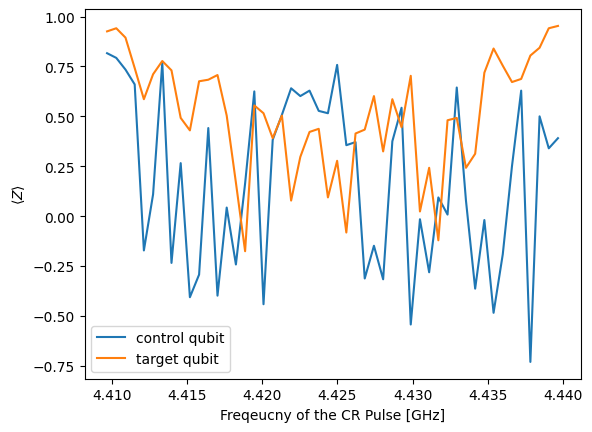

In [ ]:
control_expectations = []
target_expectations = []
classifier1 = qubit_classifiers[0]
classifier2 = qubit_classifiers[1]
for i in range(50):
    iq_data0 = cr_freq_results.get_memory(i)[:, target_qubit] * scale_factor
    # if i <= 31:
    iq_data1 = cr_freq_results.get_memory(i)[:, control_qubit] * scale_factor

    val0 = classifier2.predict(reshape_complex_vec(iq_data0))
    val1 = classifier1.predict(reshape_complex_vec(iq_data1))
    control_expectation = 0
    target_expectation = 0
    target_results = [0,0,0]
    control_results = [0,0,0]
    for v in val0:
        if v == 0:
            target_expectation += 1
            target_results[0]+=1
        if v == 1:
            target_expectation += 1
            target_results[1]+=1
        if v == 2:
            target_expectation -= 1
            target_results[2]+=1
    for v in val1:
        if v == 0:
            control_expectation += 1
            control_results[0]+=1
        if v == 1:
            control_expectation += 1
            control_results[1]+=1
        if v == 2:
            control_expectation -= 1
            control_results[2]+=1
    control_expectations.append(control_expectation/512)
    target_expectations.append(target_expectation/512)
    print(sweep_freqs[i]/GHz)
    print(control_results, control_expectation/512)
    print(target_results, target_expectation/512)
    print()
plt.plot(sweep_freqs/GHz, control_expectations, label = 'control qubit')
plt.plot(sweep_freqs/GHz, target_expectations, label = 'target qubit')
plt.xlabel('Freqeucny of the CR Pulse [GHz]')
plt.ylabel('$\\langle Z\\rangle$')
plt.legend()
plt.show()

Amplitude Sweep: We find the amplitude for the CR pulse by looking at $\langle Z\rangle$

In [25]:
def build_cr_amp_scheds(qc: int, qt: int, cr_amps, phase = 0.0, ZI_MHz = 0.0) -> np.array:
    """Build an array of cross resonance schedules for the Hamiltonian tomography experiment.
    
    Args:
      qc: control qubit index
      qt: target qubit index
      cr_amps: array of widths of the cross resonance pulses
      phase: phase offset of the cross resonance pulse (rad)
      ZI_MHz: ZI interaction rate (in MHz) to correct for with frame change
    """
    tomo_circs = []
    cr_gate = Gate('CR Pulse', 2, [])
    for cr_amp in cr_amps:
        # for width in cr_times:
            # cr_duration = int(width + 2 * cr_risefall * cr_sigma)
            # print(cr_duration % 16)
            for basis in ['Z']:
                for control in ['1', '2']:
                    control_in_two = False
                    if control == '2':
                        control_in_two = True
                    # framechange = 2 * np.pi * int(cr_square_width) * dt * ZI_MHz * 1e6
                    cr_sched = cr_pulse_sequence(control_in_two, basis, cr_amp, cr_duration, cr_square_width, 0.0)
                    tomo_circ = QuantumCircuit(backend_config.num_qubits, backend_config.num_qubits) 
                    tomo_circ.x(qc)
                    tomo_circ.x(qt)
                    tomo_circ.append(cr_gate, [qc, qt])  #apply custom cr_gate
                    # tomo_circ.rz(-framechange, qc)  #apply frame change on the qc
                    # tomo_circ.barrier(qc, qt)
                    # for i in range(127):
                    tomo_circ.measure(qc, qc)
                    tomo_circ.measure(qt, qt)  
                    # tomo_circ.measure_all()
                    tomo_circ.add_calibration(cr_gate, (qc, qt), cr_sched, [])
                    tomo_circs.append(tomo_circ)
                
                
    # tomo_circs_transpiled = transpile(tomo_circs, backend, optimization_level = 1)            
    return tomo_circs, schedule(tomo_circs, backend=backend)

[0.         0.01632653 0.03265306 0.04897959 0.06530612 0.08163265
 0.09795918 0.11428571 0.13061224 0.14693878 0.16326531 0.17959184
 0.19591837 0.2122449  0.22857143 0.24489796 0.26122449 0.27755102
 0.29387755 0.31020408 0.32653061 0.34285714 0.35918367 0.3755102
 0.39183673 0.40816327 0.4244898  0.44081633 0.45714286 0.47346939
 0.48979592 0.50612245 0.52244898 0.53877551 0.55510204 0.57142857
 0.5877551  0.60408163 0.62040816 0.63673469 0.65306122 0.66938776
 0.68571429 0.70204082 0.71836735 0.73469388 0.75102041 0.76734694
 0.78367347 0.8       ]
100


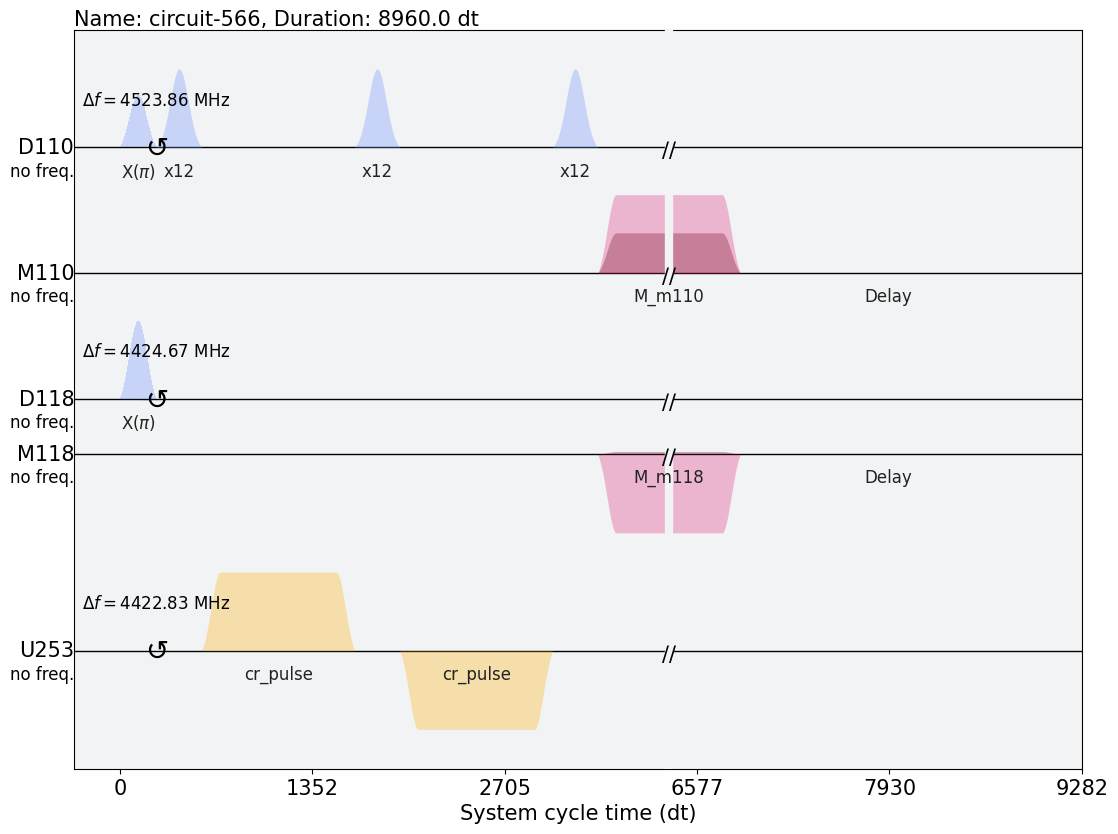

In [27]:
cr_amps = np.linspace(0,0.8,50)
print(cr_amps)
exp_cr_amp_circs, cr_scheds = build_cr_amp_scheds(control_qubit, target_qubit, cr_amps)
print(len(exp_cr_amp_circs))
cr_scheds[-1].draw()

In [ ]:

# cr_amp_job = backend.run(exp_cr_amp_circs, meas_level=1, meas_return = 'single', shots = 768)


In [30]:
cr_amp_results1 = backend.retrieve_job('crw718n7wv80008fg9e0').result()
cr_amp_results2 = backend.retrieve_job('crw716mx484g008fbyhg').result()
# print(cr_amp_results)

0.0 [42, 1278, 216] 0.7108433734939759
0.0 [15, 171, 1350] -0.7751479289940828
0.0163265306122449 [38, 1273, 225] 0.6995994659546061
0.0163265306122449 [10, 163, 1363] -0.7863695937090432
0.0326530612244898 [32, 1276, 228] 0.6968085106382979
0.0326530612244898 [16, 171, 1349] -0.775
0.0489795918367347 [46, 1242, 248] 0.6671140939597315
0.0489795918367347 [11, 180, 1345] -0.7639344262295082
0.0653061224489796 [33, 1256, 247] 0.6713240186294078
0.0653061224489796 [13, 158, 1365] -0.7925147734734077
0.0816326530612245 [39, 1269, 228] 0.6953907815631263
0.0816326530612245 [18, 175, 1343] -0.769433465085639
0.0979591836734694 [35, 1238, 263] 0.6495669553630913
0.0979591836734694 [23, 171, 1342] -0.7739590218109715
0.1142857142857143 [37, 1266, 233] 0.6891260840560374
0.1142857142857143 [15, 162, 1359] -0.7869822485207101
0.1306122448979592 [51, 1275, 210] 0.7171717171717171
0.1306122448979592 [22, 197, 1317] -0.7397622192866579
0.1469387755102041 [43, 1247, 246] 0.6704621567314133
0.1469387

/opt/homebrew/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


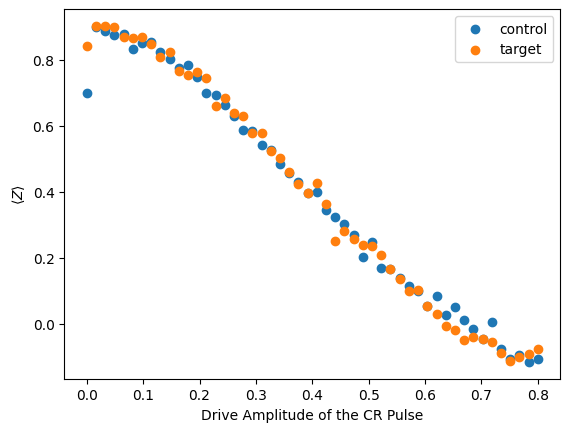

In [35]:

classifier = qubit_classifiers[0]
classifier2 = qubit_classifiers[1]
control_expectation_vals = np.zeros((2,len(cr_amps)), dtype = complex)
target_expectation_vals = np.zeros((2,len(cr_amps)), dtype = complex)
for i in range(len(exp_cr_amp_circs)):
    iq_data0 = cr_amp_results1.get_memory(i)[:, control_qubit] * scale_factor
    # if i <= 31:
    iq_data1 = cr_amp_results2.get_memory(i)[:, control_qubit] * scale_factor

    val0 = classifier.predict(reshape_complex_vec(iq_data0))
    val1 = classifier.predict(reshape_complex_vec(iq_data1))
    expectation = 0
    results = [0,0,0]
    for v in val0:
        if v == 0:
            # expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    for v in val1:
        if v == 0:
            # expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    # if i % 2 == 0:
    print(cr_amps[i//2], results, expectation/(1536-results[0]))
    control_expectation_vals[i%2,i//2] = expectation/(1536-results[0])

for i in range(len(exp_cr_amp_circs)):
    iq_data0 = cr_amp_results1.get_memory(i)[:, target_qubit] * scale_factor
    # if i <= 31:
    iq_data1 = cr_amp_results2.get_memory(i)[:, target_qubit] * scale_factor

    val0 = classifier2.predict(reshape_complex_vec(iq_data0))
    val1 = classifier2.predict(reshape_complex_vec(iq_data1))
    expectation = 0
    results = [0,0,0]
    for v in val0:
        if v == 0:
            # expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    for v in val1:
        if v == 0:
            # expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    # if i % 2 == 0:
    print(cr_amps[i//2], results, expectation/(1536-results[0]))
    target_expectation_vals[i%2,i//2] = expectation/(1536-results[0])

plt.scatter(cr_amps, target_expectation_vals[0,:], label = 'control')
plt.scatter(cr_amps, target_expectation_vals[1:], label = 'target')
plt.xlabel('Drive Amplitude of the CR Pulse')
plt.ylabel('$\\langle Z\\rangle$')
plt.legend()
plt.show()


In [36]:
# cr_amp = 0.68 #ZX(pi/2) rotation supposedly
cr_amp = 0.6693877551020408 

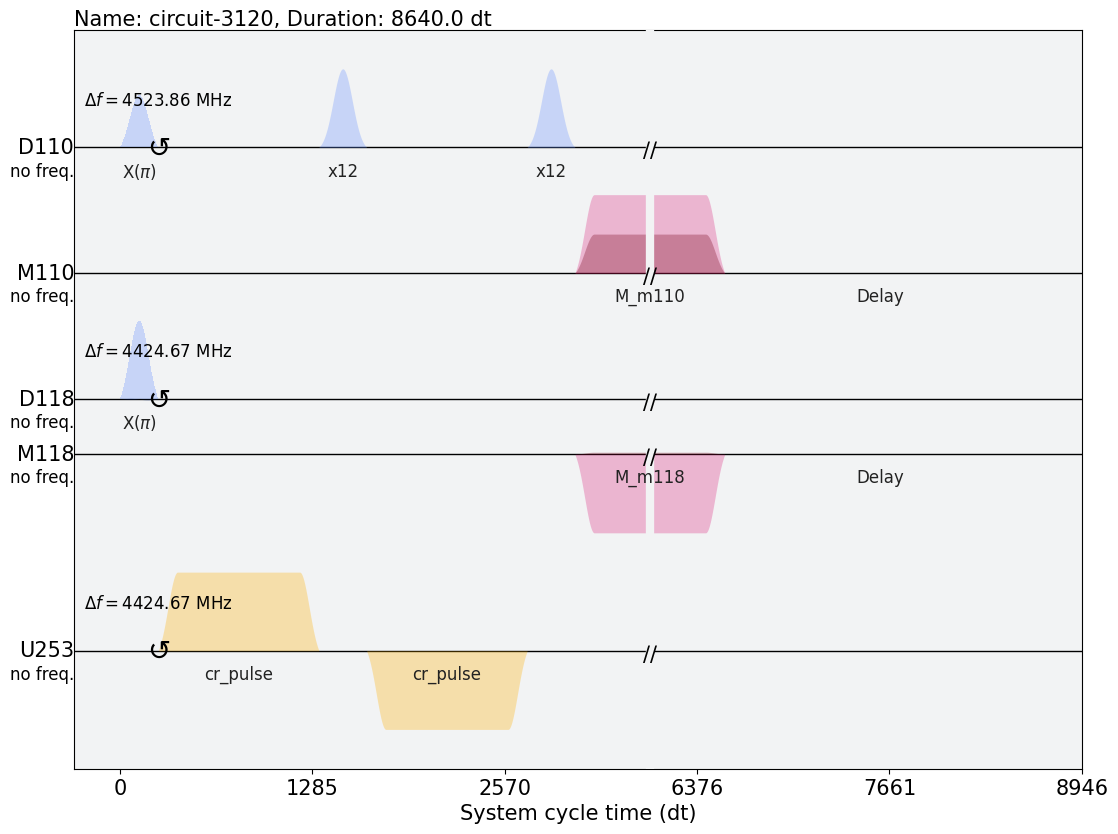

In [ ]:
cr_gate = Gate('CR Pulse', 2, [])
cr_sched1 = cr_pulse_sequence(False, 'Z', cr_amp, cr_duration, cr_square_width, 0.0)
tomo_circ1 = QuantumCircuit(target_qubit+1, target_qubit+1) 
tomo_circ1.x(control_qubit)
tomo_circ1.x(target_qubit)
tomo_circ1.append(cr_gate, [control_qubit, target_qubit])  #apply custom cr_gate
# tomo_circ.rz(-framechange, qc)  #apply frame change on the qc
# tomo_circ.barrier(qc, qt)
# for i in [0,1,2,14]:
tomo_circ1.measure(control_qubit, control_qubit)
tomo_circ1.measure(target_qubit, target_qubit)   
# tomo_circ.measure_all()
tomo_circ1.add_calibration(cr_gate, (control_qubit, target_qubit), cr_sched1, [])
schedule(tomo_circ1, backend).draw()

In [ ]:
# cr_amp_check = backend.run(tomo_circ1, meas_level=1, meas_return = 'single', shots = 2048)


In [ ]:
amp_check_results = backend.retrieve_job('crw6y6gy7jt000808zeg').result()

In [ ]:
classifier = qubit_classifiers[1]
for i in range(1):
    iq_data = amp_check_results.get_memory(i)[:,target_qubit] * scale_factor
    val = classifier.predict(reshape_complex_vec(iq_data))

    expectation = 0
    results = [0,0,0]
    for v in val:
        if v == 0:
            # expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    print(results, expectation/(2048-results[0]))

[23, 821, 1204] -0.1891358024691358


In [38]:
IBMQ.save_account('37e705156a95d8ed24c79515ed1bf2bd894cf85c45cfd22298a079e23f6a2d7ae2a22555ebfdb8e99d7daa4b998a4280fbae7f6c0e6fe97b832e3cd0c8a1a0ef', overwrite=True)
IBMQ.load_account()

# get backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_sherbrooke')
backend_defaults = backend.defaults()

ibmqfactory.load_account:WARNING:2024-05-06 08:06:14,228: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
def build_cr_tomo_scheds(qc: int, qt: int, cr_times, ZI_MHz = 0.0) -> np.array:
    """Build an array of cross resonance schedules for the Hamiltonian tomography experiment.
    
    Args:
      qc: control qubit index
      qt: target qubit index
      cr_amps: array of widths of the cross resonance pulses
      phase: phase offset of the cross resonance pulse (rad)
      ZI_MHz: ZI interaction rate (in MHz) to correct for with frame change
    """
    tomo_circs = []
    cr_gate = Gate('CR Pulse', 2, [])
    for width in cr_times:
        cr_duration = int(width + 2 * cr_risefall * cr_sigma)
        for basis in ['X','Y', 'Z']:
            for control in ['1', '2']:
                control_in_two = False
                if control == '2':
                    control_in_two = True
                # framechange = 2 * np.pi * int(cr_square_width) * dt * ZI_MHz * 1e6
                cr_sched = cr_pulse_sequence(control_in_two, basis, cr_amp, cr_duration, width, cr_phase = 0.0)
                tomo_circ = QuantumCircuit(backend_config.num_qubits, backend_config.num_qubits) 
                tomo_circ.x(qc)
                tomo_circ.x(qt)
                tomo_circ.append(cr_gate, [qc, qt])  #apply custom cr_gate
                # tomo_circ.rz(-framechange, qc)  #apply frame change on the qc
                # tomo_circ.barrier(qc, qt)
                # for i in range(127):
                tomo_circ.measure(qc, qc)
                tomo_circ.measure(qt, qt)  
                # tomo_circ.measure_all()
                tomo_circ.add_calibration(cr_gate, (qc, qt), cr_sched, [])
                tomo_circs.append(tomo_circ)
                
                
    # tomo_circs_transpiled = transpile(tomo_circs, backend, optimization_level = 1)            
    return tomo_circs, schedule(tomo_circs, backend=backend)

[ 256.  352.  448.  544.  640.  736.  832.  928. 1024. 1120. 1216. 1312.
 1408. 1504. 1600. 1696. 1792. 1888. 1984. 2080. 2176.]
126


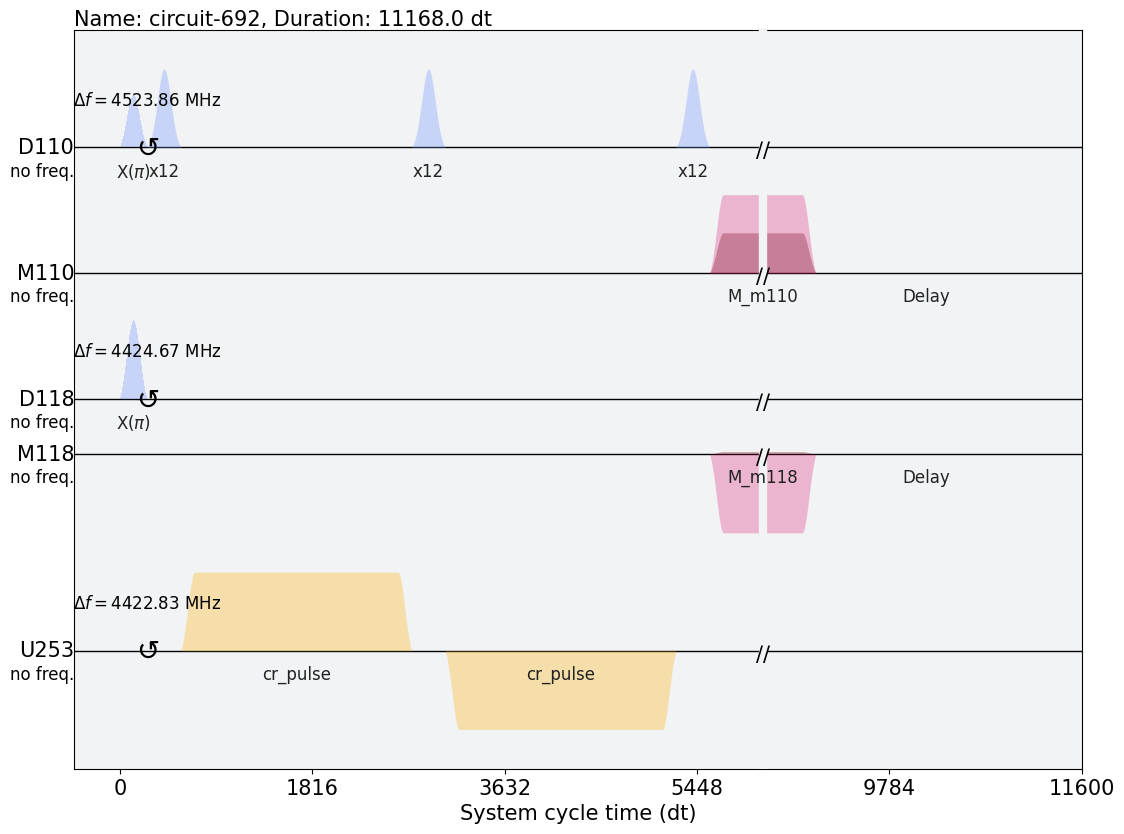

In [41]:
cr_times = 16*np.linspace(0,120,21)
print(cr_times + 2*cr_risefall*cr_sigma)
exp_cr_tomo_circs, cr_scheds = build_cr_tomo_scheds(control_qubit, target_qubit, cr_times)
print(len(exp_cr_tomo_circs))
cr_scheds[-1].draw()


In [43]:
# cr_tomo_job = backend.run(exp_cr_tomo_circs, meas_level=1, meas_return = 'single', shots = 512)
# cr_tomo1_job_ids.append(cr_tomo_job.job_id())
# job_monitor(cr_tomo_job)

In [44]:
cr_tomo_results1 = backend.retrieve_job('crwcfxqdbt40008jxnhg').result()
cr_tomo_results2 = backend.retrieve_job('crwcfz77wv80008fgvtg').result()

In [45]:

classifier = qubit_classifiers[1]
expectation_vals = np.zeros((6, len(cr_times)))
for i in range(len(exp_cr_tomo_circs)):
    iq_data0 = cr_tomo_results1.get_memory(i)[:, target_qubit] * scale_factor
    iq_data1 = cr_tomo_results2.get_memory(i)[:, target_qubit] * scale_factor

    val0 = classifier.predict(reshape_complex_vec(iq_data0))
    val1 = classifier.predict(reshape_complex_vec(iq_data1))
    expectation = 0
    results = [0,0,0]
    for v in val0:
        if v == 0:
            expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    for v in val1:
        if v == 0:
            expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    # if i % 2 == 0:
    print(i//6, results, expectation/1024)
    expectation_vals[i%6, i//6] = expectation/1024

0 [8, 544, 472] 0.078125
0 [12, 349, 663] -0.294921875
0 [16, 448, 560] -0.09375
0 [9, 481, 534] -0.04296875
0 [15, 850, 159] 0.689453125
0 [6, 954, 64] 0.875
1 [7, 576, 441] 0.138671875
1 [10, 324, 690] -0.34765625
1 [11, 471, 542] -0.05859375
1 [9, 474, 541] -0.056640625
1 [14, 839, 171] 0.666015625
1 [10, 896, 118] 0.76953125
2 [15, 540, 469] 0.083984375
2 [8, 331, 685] -0.337890625
2 [16, 539, 469] 0.083984375
2 [13, 477, 534] -0.04296875
2 [13, 858, 153] 0.701171875
2 [14, 915, 95] 0.814453125
3 [11, 470, 543] -0.060546875
3 [14, 328, 682] -0.33203125
3 [11, 585, 428] 0.1640625
3 [12, 518, 494] 0.03515625
3 [8, 845, 171] 0.666015625
3 [17, 916, 91] 0.822265625
4 [6, 364, 654] -0.27734375
4 [16, 362, 646] -0.26171875
4 [12, 598, 414] 0.19140625
4 [8, 535, 481] 0.060546875
4 [8, 831, 185] 0.638671875
4 [12, 894, 118] 0.76953125
5 [6, 259, 759] -0.482421875
5 [8, 409, 607] -0.185546875
5 [7, 591, 426] 0.16796875
5 [11, 626, 387] 0.244140625
5 [11, 830, 183] 0.642578125
5 [11, 848, 16

In [46]:
avg_t_c = expectation_vals

In [47]:
from scipy.optimize import curve_fit

def get_omega(eDelta, eOmega_x, eOmega_y):
    """Return \Omega from parameter arguments."""
    eOmega = np.sqrt(eDelta**2 + eOmega_x**2 + eOmega_y**2)
    return eOmega

def avg_X(t, eDelta, eOmega_x, eOmega_y):
    """Return average X Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eXt = (-eDelta*eOmega_x + eDelta*eOmega_x*np.cos(eOmega*t) + \
           eOmega*eOmega_y*np.sin(eOmega*t)) / eOmega**2 
    return eXt

def avg_Y(t, eDelta, eOmega_x, eOmega_y):
    """Return average Y Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eYt = (eDelta*eOmega_y - eDelta*eOmega_y*np.cos(eOmega*t) - \
           eOmega*eOmega_x*np.sin(eOmega*t)) / eOmega**2 -0.4
    return eYt

def avg_Z(t, eDelta, eOmega_x, eOmega_y):
    """Return average Z Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eZt = (eDelta**2 + (eOmega_x**2 + eOmega_y**2)*np.cos(eOmega*t)) / eOmega**2 -0.4
    return eZt

def rt_evol(ts, eDelta, eOmega_x, eOmega_y):
    """Stack average X,Y,Z Pauli measurements vertically."""
    return np.vstack([avg_X(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Y(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Z(ts, eDelta, eOmega_x, eOmega_y)])
    
def rt_flat(ts, eDelta, eOmega_x, eOmega_y):
    """Flatten X,Y,Z Pauli measurement data into 1D array."""
    return rt_evol(ts[0:len(ts)//3], eDelta, eOmega_x, eOmega_y).flatten()

def fit_rt_evol(ts, eXt, eYt, eZt, p0):
    """Use curve_fit to determine fit parameters of X,Y,Z Pauli measurements together."""
    rt_vec = np.asarray([eXt, eYt, eZt])
    
    return curve_fit(rt_flat, np.tile(ts, 3), rt_vec.flatten(), p0=p0, method='trf')

In [48]:
def get_omega_exc(eDelta, eOmega_x, eOmega_y):
    """Return \Omega from parameter arguments."""
    eOmega = np.sqrt(eDelta**2 + eOmega_x**2 + eOmega_y**2)
    return eOmega

def avg_X_exc(t, eDelta, eOmega_x, eOmega_y):
    """Return average X Pauli measurement vs time t"""
    eOmega = get_omega_exc(eDelta, eOmega_x, eOmega_y)
    eXt = (-eDelta*eOmega_x + eDelta*eOmega_x*np.cos(eOmega*t) + \
           eOmega*eOmega_y*np.sin(eOmega*t)) / eOmega**2 -0.2
    return eXt

def avg_Y_exc(t, eDelta, eOmega_x, eOmega_y):
    """Return average Y Pauli measurement vs time t"""
    eOmega = get_omega_exc(eDelta, eOmega_x, eOmega_y)
    eYt = (eDelta*eOmega_y - eDelta*eOmega_y*np.cos(eOmega*t) - \
           eOmega*eOmega_x*np.sin(eOmega*t)) / eOmega**2 +0.2
    return eYt

def avg_Z_exc(t, eDelta, eOmega_x, eOmega_y):
    """Return average Z Pauli measurement vs time t"""
    eOmega = get_omega_exc(eDelta, eOmega_x, eOmega_y)
    eZt = (eDelta**2 + (eOmega_x**2 + eOmega_y**2)*np.cos(eOmega*t)) / eOmega**2 -0.25
    return eZt

def rt_evol_exc(ts, eDelta, eOmega_x, eOmega_y):
    """Stack average X,Y,Z Pauli measurements vertically."""
    return np.vstack([avg_X_exc(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Y_exc(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Z_exc(ts, eDelta, eOmega_x, eOmega_y)])
    
def rt_flat_exc(ts, eDelta, eOmega_x, eOmega_y):
    """Flatten X,Y,Z Pauli measurement data into 1D array."""
    return rt_evol_exc(ts[0:len(ts)//3], eDelta, eOmega_x, eOmega_y).flatten()

def fit_rt_evol_exc(ts, eXt, eYt, eZt, p0):
    """Use curve_fit to determine fit parameters of X,Y,Z Pauli measurements together."""
    rt_vec = np.asarray([eXt, eYt, eZt])
    
    return curve_fit(rt_flat_exc, np.tile(ts, 3), rt_vec.flatten(), p0=p0, method='trf')

In [49]:
def get_interation_rates_MHz(ground_fit, excited_fit):
    """Determine interaction rates from fits to ground and excited control qubit data."""
    Delta0 = (ground_fit[0]/dt)/1e6
    Omega0_x = (ground_fit[1]/dt)/1e6
    Omega0_y = (ground_fit[2]/dt)/1e6
    Delta1 = (excited_fit[0]/dt)/1e6
    Omega1_x = (excited_fit[1]/dt)/1e6
    Omega1_y = (excited_fit[2]/dt)/1e6
    
    IX = 0.5*(Omega0_x + Omega1_x)

    IY = 0.5*(Omega0_y + Omega1_y)
    IZ = 0.5*(Delta0 + Delta1)
    ZX = 0.5*(Omega0_x - Omega1_x)
    ZY = 0.5*(Omega0_y - Omega1_y)
    ZZ = 0.5*(Delta0 - Delta1)
    
    return [[IX, IY, IZ], [ZX, ZY, ZZ]]

def plot_cr_ham_tomo(cr_times, avg_t_c, ground_fit, excited_fit):
    """Plot Hamiltonian tomography data and curve fits with interaction rates."""
    coeffs = get_interation_rates_MHz(ground_fit, excited_fit)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15), sharey = True)
    ax1.scatter(cr_times, avg_t_c[0,:].real, lw=3.0, color='blue', label='ctrl in |1>')
    ax1.plot(cr_times, avg_X(cr_times, *ground_fit), lw=3.0, color='blue')
    ax1.scatter(cr_times, avg_t_c[1,:].real, lw=3.0, color='red', label='ctrl in |2>')
    ax1.plot(cr_times, avg_X_exc(cr_times, *excited_fit), lw=3.0, color='red')
    ax1.set_ylabel('<X(t)>', fontsize=20)
    ax1.set_title('Pauli Expectation Value', fontsize=20)
    ax1.legend(loc=4, fontsize=14)
    ax2.scatter(cr_times, avg_t_c[2,:].real, lw=3.0, color='blue', label='ctrl in |1>')
    ax2.plot(cr_times, avg_Y(cr_times, *ground_fit), lw=3.0, color='blue')
    ax2.scatter(cr_times, avg_t_c[3,:].real, lw=3.0, color='red', label='ctrl in |2>')
    ax2.plot(cr_times, avg_Y_exc(cr_times, *excited_fit), lw=3.0, color='red')
    ax2.set_title('IX = %.3f MHz   IY = %.3f MHz   IZ = %.3f MHz' % \
              (coeffs[0][0], coeffs[0][1], coeffs[0][2]), fontsize=20)
    ax2.set_ylabel('<Y(t)>', fontsize=20)
    ax2.legend(loc=4, fontsize=14)
    ax3.scatter(cr_times, avg_t_c[4,:].real, lw=3.0, color='blue', label='ctrl in |1>')
    ax3.plot(cr_times, avg_Z(cr_times, *ground_fit), lw=3.0, color='blue')
    ax3.scatter(cr_times, avg_t_c[5,:].real, lw=3.0, color='red', label='ctrl in |2>')
    ax3.plot(cr_times, avg_Z_exc(cr_times, *excited_fit), lw=3.0, color='red')
    ax3.set_title('ZX = %.3f MHz   ZY = %.3f MHz   ZZ = %.3f MHz' % \
              (coeffs[1][0], coeffs[1][1], coeffs[1][2]), fontsize=20)
    ax3.set_ylabel('<Z(t)>', fontsize=20)
    ax3.set_xlabel('time (dt)', fontsize=20)
    ax3.legend(loc=4, fontsize=14)

In [50]:
# cr_times = 16*np.linspace(0,200,21)

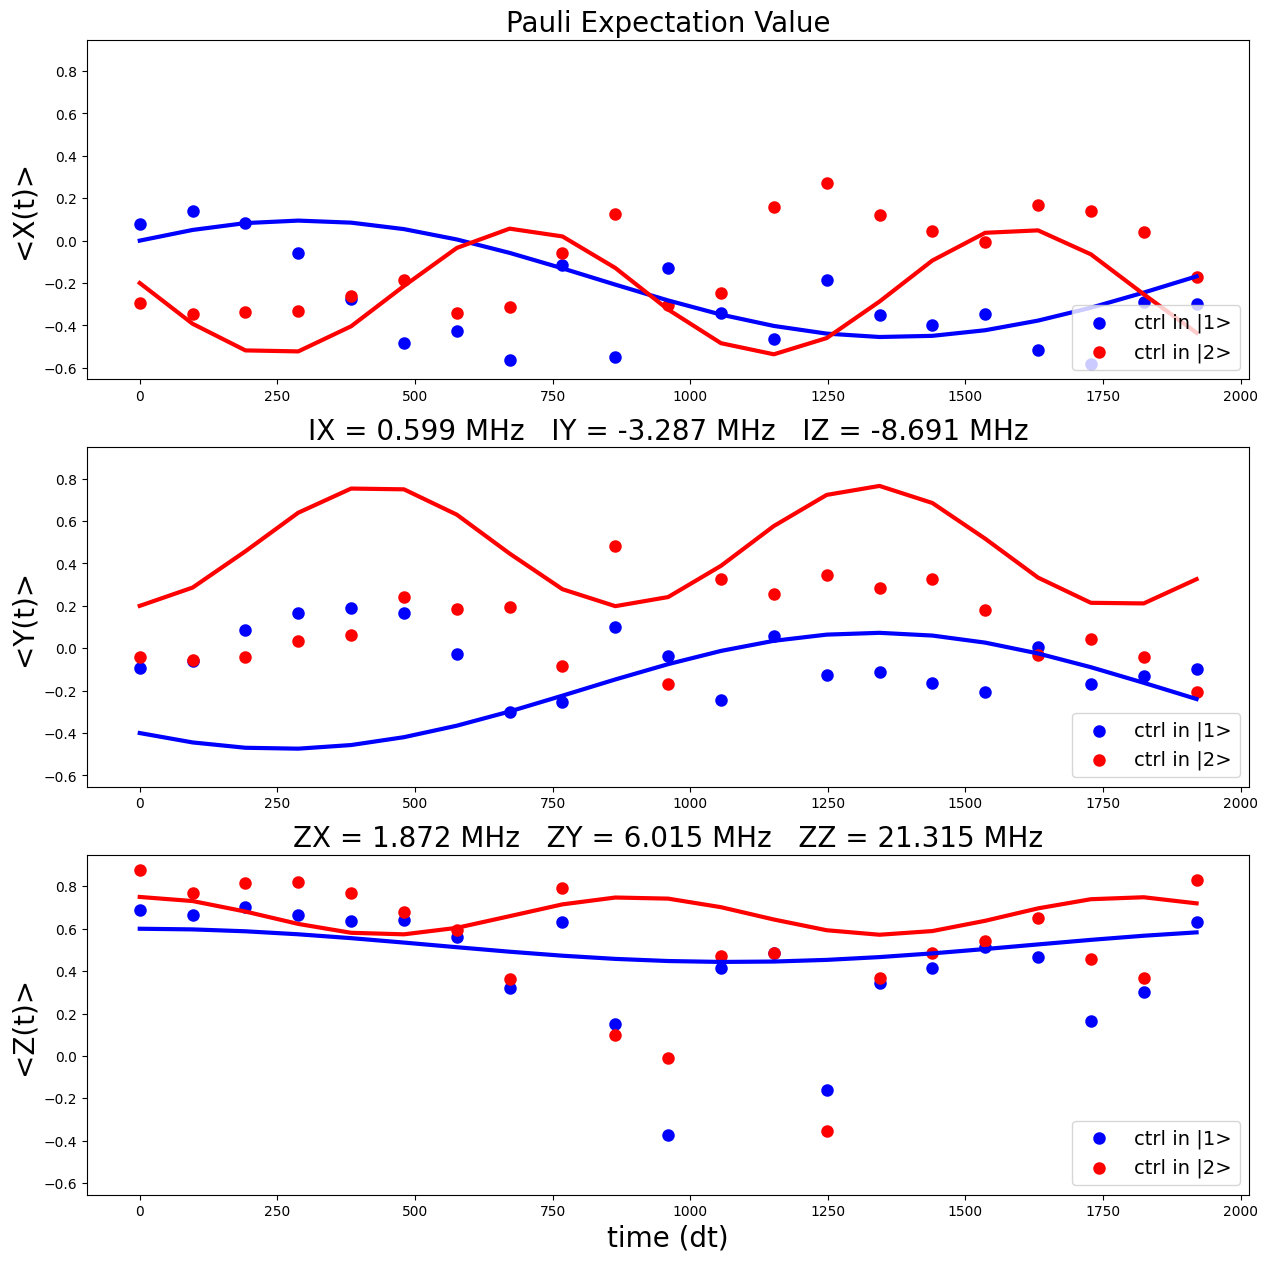

In [51]:
ground_fit,_ = fit_rt_evol(cr_times, avg_t_c[0,:], avg_t_c[2,:], avg_t_c[4,:], p0=[0.00004, 0.002, 0.002])
excited_fit,_ = fit_rt_evol(cr_times, avg_t_c[1,:], avg_t_c[3,:], avg_t_c[5,:], p0=[-0.004, 0.002, 0.002])

plot_cr_ham_tomo(cr_times, avg_t_c, ground_fit, excited_fit)

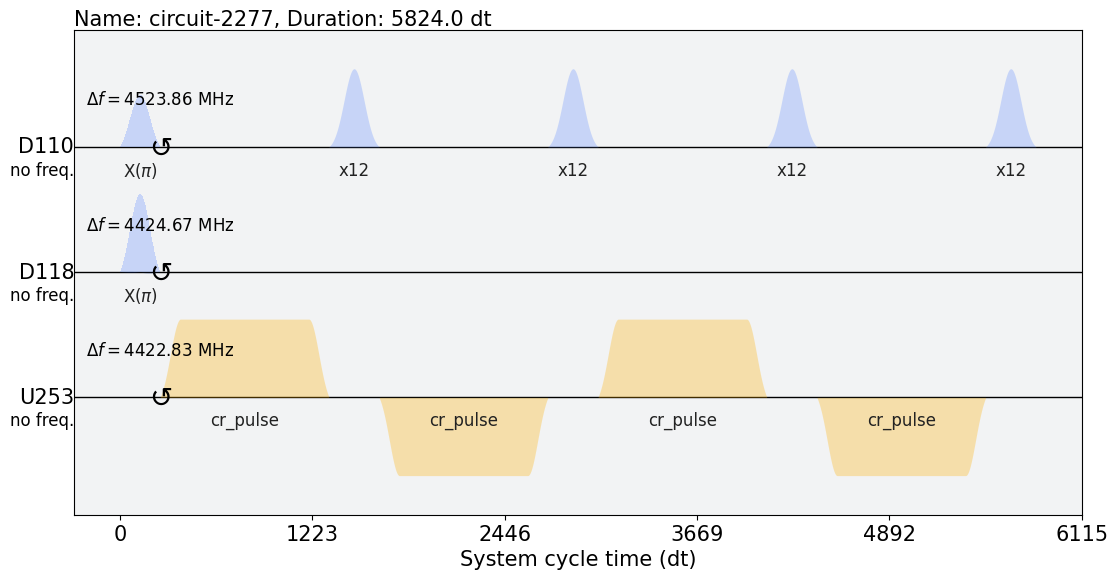

In [291]:
cr_gate = Gate('cr_gate', 2, [])
test_circ = QuantumCircuit(target_qubit+1, target_qubit+1)
test_circ.x(control_qubit)
test_circ.x(target_qubit)
test_circ.append(cr_gate, [control_qubit, target_qubit])
test_circ.append(cr_gate, [control_qubit, target_qubit])
cr_sched = cr_pulse_sequence(False, 'Z', cr_amp, cr_duration, cr_square_width, cr_phase = 0.0)
test_circ.add_calibration(cr_gate, (control_qubit, target_qubit), cr_sched, [])

schedule(test_circ, backend).draw()

Phase test?

In [292]:
def build_cr_phase_scheds(qc: int, qt: int, cr_phase, ZI_MHz = 0.0) -> np.array:
    """Build an array of cross resonance schedules for the Hamiltonian tomography experiment.
    
    Args:
      qc: control qubit index
      qt: target qubit index
      cr_amps: array of widths of the cross resonance pulses
      phase: phase offset of the cross resonance pulse (rad)
      ZI_MHz: ZI interaction rate (in MHz) to correct for with frame change
    """
    tomo_circs = []
    cr_gate = Gate('CR Pulse', 2, [])
    for phase in cr_phases:
        for basis in ['Y']:
            for control in ['1', '2']:
                control_in_two = False
                if control == '2':
                    control_in_two = True
                # framechange = 2 * np.pi * int(cr_square_width) * dt * ZI_MHz * 1e6
                cr_sched = cr_pulse_sequence(control_in_two, basis, cr_amp, cr_duration, cr_square_width, phase)
                tomo_circ = QuantumCircuit(backend_config.num_qubits, backend_config.num_qubits) 
                tomo_circ.x(qc)
                tomo_circ.x(qt)
                tomo_circ.append(cr_gate, [qc, qt])  #apply custom cr_gate
                # tomo_circ.rz(-framechange, qc)  #apply frame change on the qc
                # tomo_circ.barrier(qc, qt)
                # for i in range(127):
                tomo_circ.measure(qc, qc)
                tomo_circ.measure(qt, qt)  
                # tomo_circ.measure_all()
                tomo_circ.add_calibration(cr_gate, (qc, qt), cr_sched, [])
                tomo_circs.append(tomo_circ)
                
                
    # tomo_circs_transpiled = transpile(tomo_circs, backend, optimization_level = 1)            
    return tomo_circs, schedule(tomo_circs, backend=backend)

50


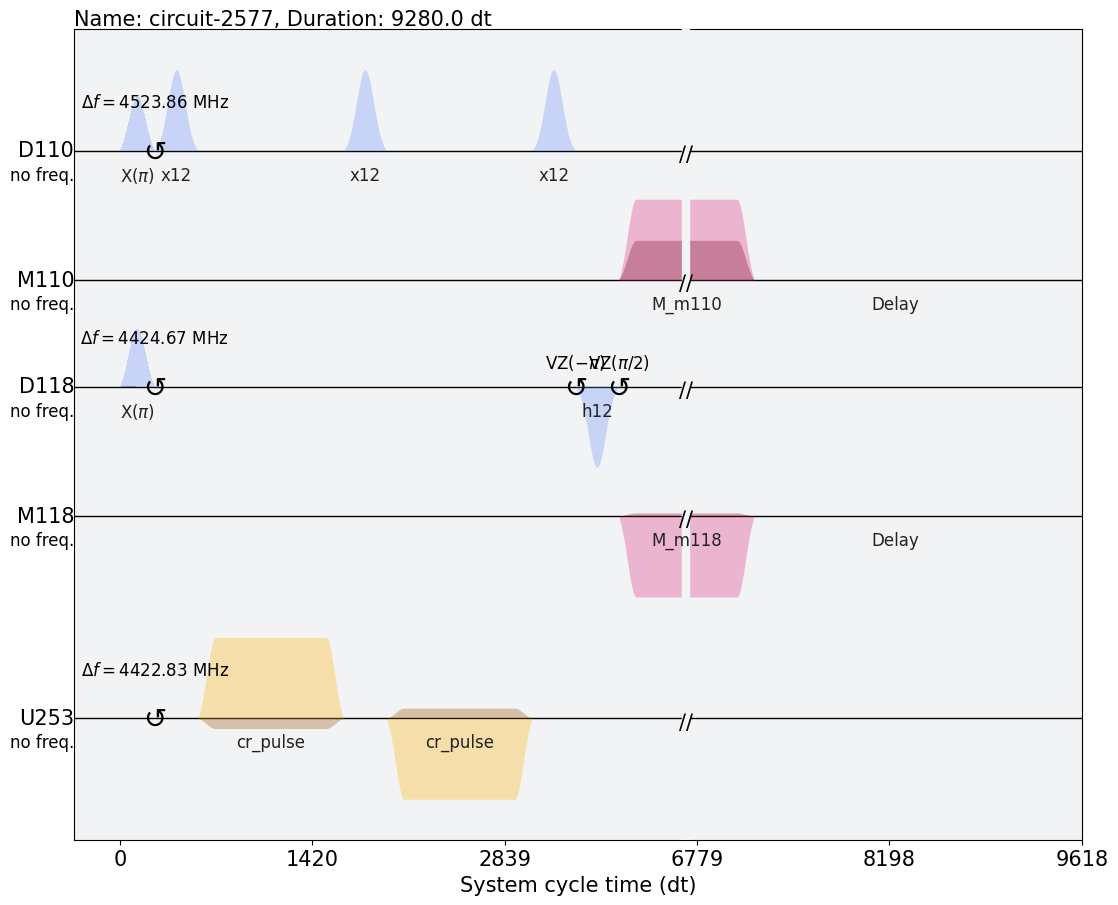

In [308]:
cr_phases = np.arange(np.pi,2*np.pi,np.pi/25)

exp_cr_phase_circs, cr_scheds = build_cr_phase_scheds(control_qubit, target_qubit, cr_phases)
print(len(exp_cr_phase_circs))
cr_scheds[-1].draw()

In [309]:
# cr_phase_job = backend.run(exp_cr_phase_circs, meas_level=1, meas_return = 'single', shots = 1024)

In [324]:
cr_phase_results1 = backend.retrieve_job('crtvz4wdbt40008jshag').result()

3.141592653589793 [47, 848, 129] 0.748046875
3.141592653589793 [40, 71, 913] -0.783203125
3.267256359733385 [43, 844, 137] 0.732421875
3.267256359733385 [55, 69, 900] -0.7578125
3.392920065876977 [45, 832, 147] 0.712890625
3.392920065876977 [52, 58, 914] -0.78515625
3.518583772020569 [53, 816, 155] 0.697265625
3.518583772020569 [34, 50, 940] -0.8359375
3.6442474781641607 [35, 821, 168] 0.671875
3.6442474781641607 [28, 57, 939] -0.833984375
3.7699111843077526 [41, 849, 134] 0.73828125
3.7699111843077526 [24, 54, 946] -0.84765625
3.8955748904513445 [43, 829, 152] 0.703125
3.8955748904513445 [20, 45, 959] -0.873046875
4.021238596594936 [39, 835, 150] 0.70703125
4.021238596594936 [29, 69, 926] -0.80859375
4.146902302738528 [41, 832, 151] 0.705078125
4.146902302738528 [12, 56, 956] -0.8671875
4.27256600888212 [50, 821, 153] 0.701171875
4.27256600888212 [14, 54, 956] -0.8671875
4.398229715025712 [63, 837, 124] 0.7578125
4.398229715025712 [13, 63, 948] -0.8515625
4.523893421169304 [67, 803, 1

/opt/homebrew/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


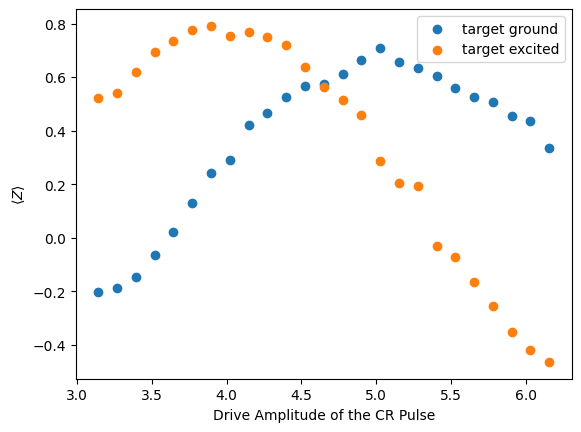

In [325]:

classifier = qubit_classifiers[0]
classifier2 = qubit_classifiers[1]
control_expectation_vals = np.zeros((2,len(cr_phases)), dtype = complex)
target_expectation_vals = np.zeros((2, len(cr_phases)), dtype = complex)
for i in range(len(exp_cr_phase_circs)):
    iq_data0 = cr_phase_results1.get_memory(i)[:, control_qubit] * scale_factor
    # if i <= 31:
    # iq_data1 = cr_amp_results2.get_memory(i)[:, control_qubit] * scale_factor

    val0 = classifier.predict(reshape_complex_vec(iq_data0))
    # val1 = classifier.predict(reshape_complex_vec(iq_data1))
    expectation = 0
    results = [0,0,0]
    for v in val0:
        if v == 0:
            expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    # for v in val1:
    #     if v == 0:
    #         expectation += 1
    #         results[0]+=1
    #     if v == 1:
    #         expectation += 1
    #         results[1]+=1
    #     if v == 2:
    #         expectation -= 1
    #         results[2]+=1
    # if i % 2 == 0:
    print(cr_phases[i//2], results, expectation/(1024))
    control_expectation_vals[i%2, i//2] = expectation/(1024)

for i in range(len(exp_cr_phase_circs)):
    iq_data0 = cr_phase_results1.get_memory(i)[:, target_qubit] * scale_factor
    # if i <= 31:
    # iq_data1 = cr_amp_results2.get_memory(i)[:, target_qubit] * scale_factor

    val0 = classifier2.predict(reshape_complex_vec(iq_data0))
    # val1 = classifier2.predict(reshape_complex_vec(iq_data1))
    expectation = 0
    results = [0,0,0]
    for v in val0:
        if v == 0:
            expectation += 1
            results[0]+=1
        if v == 1:
            expectation += 1
            results[1]+=1
        if v == 2:
            expectation -= 1
            results[2]+=1
    # for v in val1:
    #     if v == 0:
    #         # expectation += 1
    #         results[0]+=1
    #     if v == 1:
    #         expectation += 1
    #         results[1]+=1
    #     if v == 2:
    #         expectation -= 1
    #         results[2]+=1
    # if i % 2 == 0:
    print(cr_phases[i//2], results, expectation/(1024))
    target_expectation_vals[i%2, i//2] = expectation/(1024)

# plt.scatter(cr_phases, control_expectation_vals[0,:], label = 'control ground')
plt.scatter(cr_phases, target_expectation_vals[0,:], label = 'target ground')
# plt.scatter(cr_phases, control_expectation_vals[1,:], label = 'control excited')
plt.scatter(cr_phases, target_expectation_vals[1,:], label = 'target excited')
plt.xlabel('Drive Amplitude of the CR Pulse')
plt.ylabel('$\\langle Z\\rangle$')
plt.legend()
plt.show()
